In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train,y_train) , (x_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
len(x_test)

10000

In [4]:
len(x_train)

60000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
# the image in the form of array where o means black and 250 means white
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

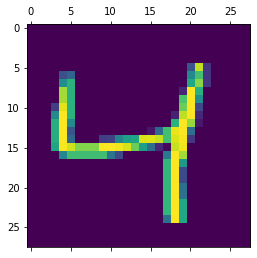

In [7]:
# Drawing the image in 3rd position
plt.matshow(x_train[2])

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
x_train.shape


(60000, 28, 28)

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
# the array is 3 diamentional so we need to convert into 2
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)


In [12]:
x_train_flatten.shape

(60000, 784)

In [13]:
x_test_flatten.shape

(10000, 784)

In [14]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4649 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9251


In [16]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2675 - accuracy: 0.9264


[0.2675415873527527, 0.9264000058174133]

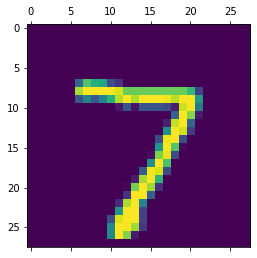

In [17]:
plt.matshow(x_test[0])

In [19]:
y_predicted=model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.4986537e-02, 3.7984847e-07, 5.4433715e-02, 9.4882751e-01,
       3.2198799e-03, 1.5491782e-01, 9.6225278e-07, 9.9985540e-01,
       1.2504686e-01, 6.5158361e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_label=[np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    2,    1,    0,    6,   10,    4,    3,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,   13,  907,   18,    8,    5,   14,   12,   49,    3],
       [   1,    1,   17,  917,    0,   31,    3,   12,   21,    7],
       [   1,    1,    3,    1,  925,    0,   11,    4,   10,   26],
       [   8,    3,    1,   19,   11,  790,   15,    7,   31,    7],
       [   7,    3,    4,    1,    8,   13,  917,    2,    3,    0],
       [   1,    6,   20,    6,    9,    0,    0,  963,    2,   21],
       [   4,   11,    5,   17,    9,   26,    9,   13,  876,    4],
       [   9,    7,    2,    7,   37,    7,    0,   28,   12,  900]])>

Text(69.0, 0.5, 'Truth')

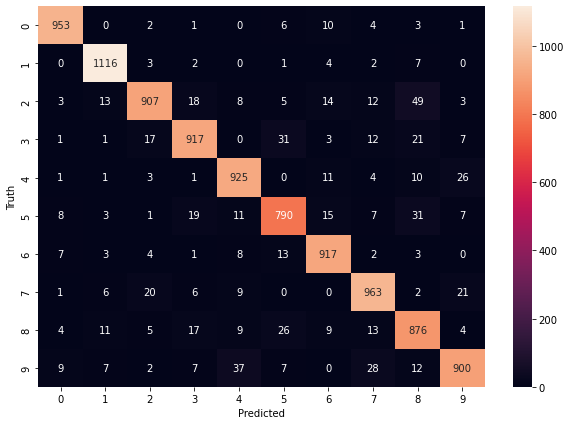

In [33]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2705 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1198 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0829 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0640 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0495 - accuracy: 0.9847


In [35]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9759


[0.08331383764743805, 0.9758999943733215]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

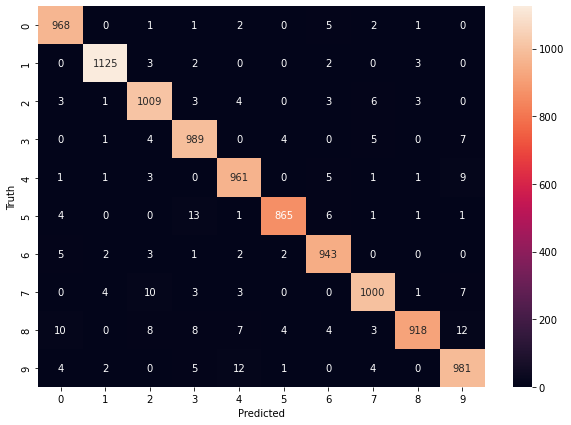

In [39]:
y_predicted= model.predict(x_test_flatten)
y_predicted_label = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)


import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
# With out flatten array
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2750 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1262 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0900 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0687 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0550 - accuracy: 0.9827
